# Generate 10 PCs of Geo

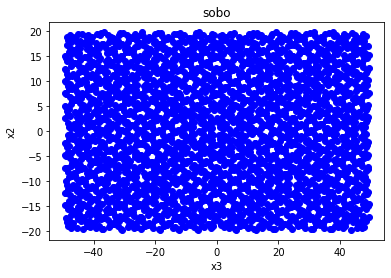

In [1]:
import matplotlib.pyplot as plt
import optunity
import random
import numpy as np
import pandas as pd

def f(x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15):
    return 0.0

_, info_random, _ = optunity.minimize(f, num_evals=3000, x1=[-50, 50], x2=[-20, 20], x3=[-20, 20], x4=[-20, 20],
                                      x5=[-20, 20], x6=[-20, 20],x7=[-10, 10], x8=[-10, 10],x9=[-10, 10],x10=[-10, 10],
                                      x11=[np.log(0.05), np.log(5)], x12=[np.log(0.1), np.log(5)], x13=[np.log(0.1), np.log(5)], x14=[np.log(0.1), np.log(5)],x15=[np.log(10),np.log(30)]
#                                       , x11=[-5, 5],x12=[-5, 5],x13=[-5, 5],x14=[-5, 5],x15=[-5, 5],x16=[-5, 5],x17=[-5, 5],x18=[-5, 5],x19=[-5, 5],
#                                       x20=[-5, 5],x21=[-5, 5],x22=[-5, 5],x23=[-5, 5],x24=[-5, 5],x25=[-5, 5]
                                      ,solver_name='sobol')
plt.plot(info_random.call_log['args']['x1'], info_random.call_log['args']['x2'], 'bo')
plt.xlabel('x3')
plt.ylabel('x2')
plt.title('sobo')
plt.show()

In [2]:
soboldata= pd.DataFrame(info_random.call_log['args'])

In [3]:
soboldata=soboldata.rename(columns={'x1':'PC1','x2':'PC2','x3':'PC3','x4':'PC4','x5':'PC5','x6':'PC6',
                         'x7':'PC7','x8':'PC8','x9':'PC9','x10':'PC10','x11':'a','x12':'b','x13':'af','x14':'bf','x15':'pressure'
#                                     ,'x11':'PC11','x12':'PC12','x13':'PC13',
#                                     'x14':'PC14','x15':'PC15','x16':'PC16','x17':'PC17',
#                          'x18':'PC18','x19':'PC19','x20':'PC20','x21':'PC21','x22':'PC22',
#                                    'x23':'PC23','x24':'PC24','x25':'PC25'
                                   })

In [4]:
order1=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10',
#       'PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20',
#       'PC21','PC22','PC23','PC24','PC25'
      ]
order2=['a','b','af','bf','pressure']
soboldata1=soboldata[order1]
soboldata2=soboldata[order2]
# soboldata.to_csv('geo_10PCs.txt',sep=',',index=None)

In [9]:
soboldata2.head()

,a,b,af,bf,pressure
0,4.371497,1.759307,0.911038,1.075992,12.554314
1,0.253006,0.411717,0.561421,1.746050,14.382578
2,2.472465,2.854889,3.892952,0.251806,24.774892
3,0.080934,1.084162,0.213203,0.663073,10.958453
4,0.790916,0.156352,1.478373,4.597817,18.876621


In [8]:
soboldata2=np.exp(soboldata2)

# Generate new Geo dataset

In [10]:
lv= pd.read_csv('UsedMeshesDat.txt',sep=',',header=None)
lv=lv.values

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(lv)
lv_pc=pca.transform(lv)

C:\Users\Yuzhang Ge\anaconda3\envs\newenv\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [12]:
np.sum(pca.explained_variance_ratio_)

0.9519056230641639

In [13]:
geo_pc=soboldata1.values
lv_new=pca.inverse_transform(geo_pc)

In [14]:
lv_new.shape

(3000, 17376)

# Geo Check

In [15]:
from numpy import linalg as LA
from scipy.spatial import ConvexHull
index=[]

for m in range(len(lv_new)):
    L1=lv_new[m].reshape(-1,3)
    v1=L1[:2896,:]
    v2=L1[2896:,:]
    hull1= ConvexHull(v1)
    hull2=ConvexHull(v2)
    md=[]
    
    for i in range(len(v1)):
        d=np.subtract(v2,v1[i])
        dis=LA.norm(d, axis=1)
        md.append(min(dis))
    if min(md)<=0.1:
        index.append(m)
        continue
            
    if hull1.volume >= hull2.volume:
        index.append(m)
        continue



    

In [16]:
np.array(index)

array([   4,   11,   20,   24,   33,   38,   44,   45,   69,   84,   85,
        100,  108,  128,  136,  145,  158,  169,  178,  188,  189,  196,
        212,  228,  240,  246,  262,  269,  275,  281,  288,  293,  308,
        314,  332,  333,  348,  360,  376,  393,  406,  412,  419,  437,
        452,  460,  477,  510,  513,  517,  520,  533,  548,  553,  560,
        579,  593,  600,  621,  636,  637,  645,  652,  660,  676,  678,
        684,  697,  704,  709,  748,  764,  770,  772,  776,  785,  798,
        801,  804,  807,  828,  829,  836,  837,  852,  853,  868,  873,
        907,  920,  940,  941,  948,  962,  980,  981,  996, 1014, 1024,
       1036, 1037, 1044, 1070, 1076, 1080, 1089, 1120, 1125, 1140, 1156,
       1180, 1181, 1192, 1201, 1211, 1251, 1269, 1284, 1288, 1297, 1304,
       1324, 1332, 1340, 1354, 1365, 1380, 1385, 1392, 1398, 1405, 1428,
       1432, 1453, 1469, 1477, 1486, 1492, 1510, 1523, 1529, 1536, 1548,
       1549, 1564, 1565, 1601, 1606, 1612, 1619, 16

In [17]:
lv_final =np.delete(lv_new,index,0)
lv_final.shape


(2724, 17376)

In [18]:
time_series_input=soboldata2.values
time_series_input=np.delete(time_series_input,index,0)

In [19]:
time_series_input

array([[ 4.37149676,  1.75930726,  0.91103791,  1.07599199, 12.55431403],
       [ 0.25300562,  0.41171727,  0.56142133,  1.7460496 , 14.38257817],
       [ 2.47246505,  2.85488904,  3.89295212,  0.2518062 , 24.77489168],
       ...,
       [ 2.43694642,  0.10560598,  0.23679626,  0.28447162, 14.75000364],
       [ 0.24937102,  0.73228253,  1.64196916,  1.97255491, 25.40780505],
       [ 0.7795536 ,  1.92829621,  0.62354804,  0.74909004, 11.2384034 ]])

In [27]:
np.savetxt('time_series_input_1820.txt',time_series_input,delimiter=',')

In [20]:
import pickle
pickle.dump(lv_new, open("lv_geo_without_check_2724.pkl", "wb"))
pickle.dump(lv_final, open("lv_geo_with_check_2724.pkl", "wb"))

In [21]:
np.savetxt('lv_geo_with_check_2724.txt',lv_final,delimiter=',')

# DATA_pre

In [22]:
data=pd.read_csv('Timeseries_input_2724.txt',delimiter=',')

In [23]:
data['a']=time_series_input[:,0]
data['b']=time_series_input[:,1]
data['af']=time_series_input[:,2]
data['bf']=time_series_input[:,3]
data['pressure']=time_series_input[:,4]

In [24]:
data.to_csv('Timeseries_input_2724.txt',index=None,sep=',')

# Plot

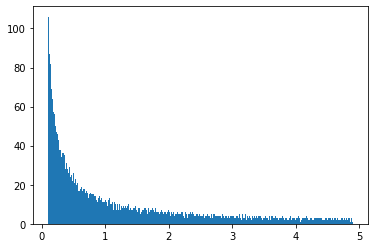

In [43]:
import matplotlib.pyplot as plt

plt.hist(time_series_input[:,3],bins=300);